# pampro - Introduction.

In [1]:
from datetime import datetime, timedelta
from pampro import Time_Series, Channel, Bout, channel_inference, data_loading

%matplotlib inline

First, we tell the data_loading.load function we want to load the example Actigraph file. This function always returns a Time_Series object, which contains a list of Channel objects depending upon the type of file being loaded, and a dictionary with useful header information.

In [2]:
ts, header = data_loading.load("S:/pampro/data/example_actigraph.DAT", "Actigraph")

Iterate through the Channels in the Time_Series we just created, and print it:

In [3]:
for channel in ts:
    print(channel)

Channel name: AG_Counts
Start: 2005-10-18 09:30:00
End: 2005-10-25 11:28:00
Duration: 7 days, 1:58:00
Data count: 10199
Timestamp count: 10199
Sparsely timestamped: False
mean_timedelta: 0:01:00
max_timedelta: 0:01:00
min_timedelta: 0:01:00


So we have 1 Channel; it is called AG_Counts, and it contains minute-level data for just over 7 days. Let's visualise it.

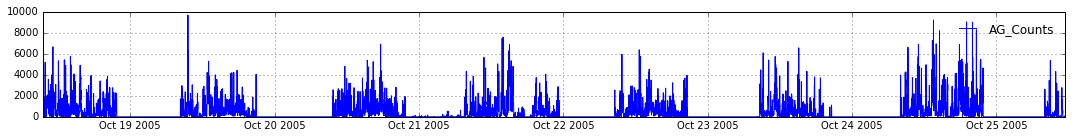

In [4]:
chart = ts.draw([["AG_Counts"]], height=2)

We can calculate statistics about our Time_Series by defining a statistics dictionary. We name the Channels we want to know about as the key, and a list of statistics we want to derive about them as the value. This calculates the mean, min and max of AG_Counts.

In [5]:
stats = {"AG_Counts":[("generic", ["mean", "min", "max"])]}

We can use this statistics dictionary to request piecewise statistics of the channels, broken down into any time window we like by specifying a timedelta object. Each statistic becomes a Channel of data itself; all of which are bundled into a neat new Time_Series object.

In [6]:
output1 = ts.piecewise_statistics(timedelta(minutes=15), stats)

We have now calculated the mean, min and max of AG_Counts over 15 minute time windows. Since this is a Time_Series object itself, we can visualise our derived statistics:

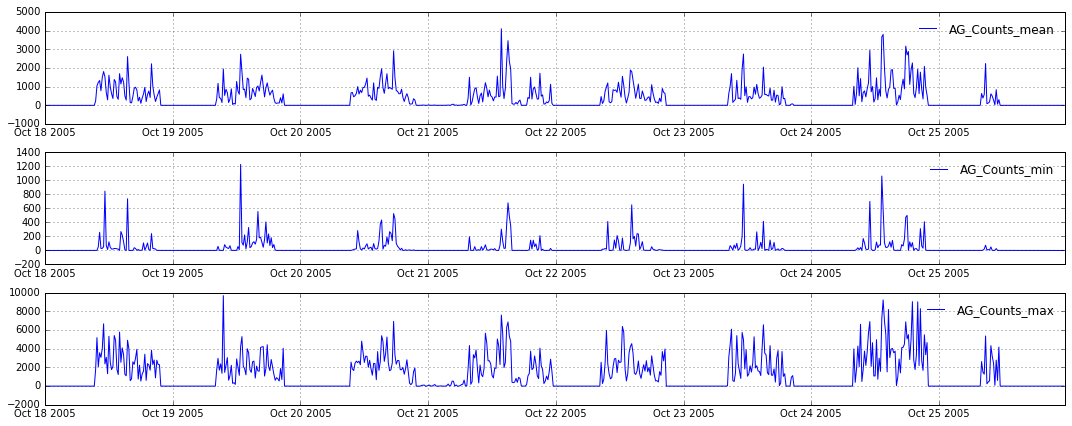

In [7]:
chart = output1.draw([["AG_Counts_mean"],["AG_Counts_min"],["AG_Counts_max"]], height=2*3)

We can also write Time_Series objects to a file. This will write the data of every Channel to the specified file in long format.

In [8]:
output1.write_channels_to_file("S:/pampro/data/actigraph_summary.csv")

All we need to do is change the timedelta value to collapse the data to a different resolution - let's get daily data instead.

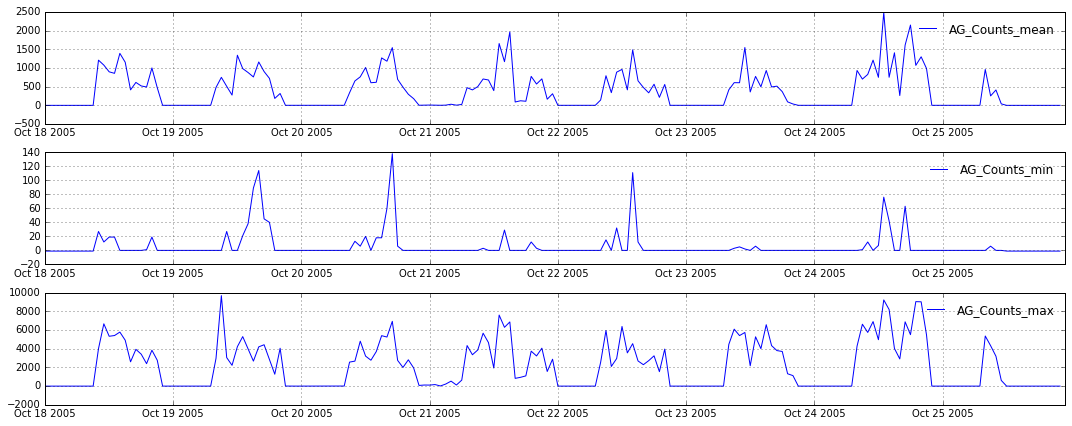

In [9]:
output2 = ts.piecewise_statistics(timedelta(hours=1), stats)
chart = output2.draw([["AG_Counts_mean"],["AG_Counts_min"],["AG_Counts_max"]], height=2*3)

A common way to analyse physical activity data is to slice it into relevant cutpoints, and count the time spent in them. This is built into the statistics dictionary. This code counts the minutes spent at different cutpoints (0-99, 100-299, 300-2999, 3000+) over hourly time windows, keeping the mean counts as a reference.

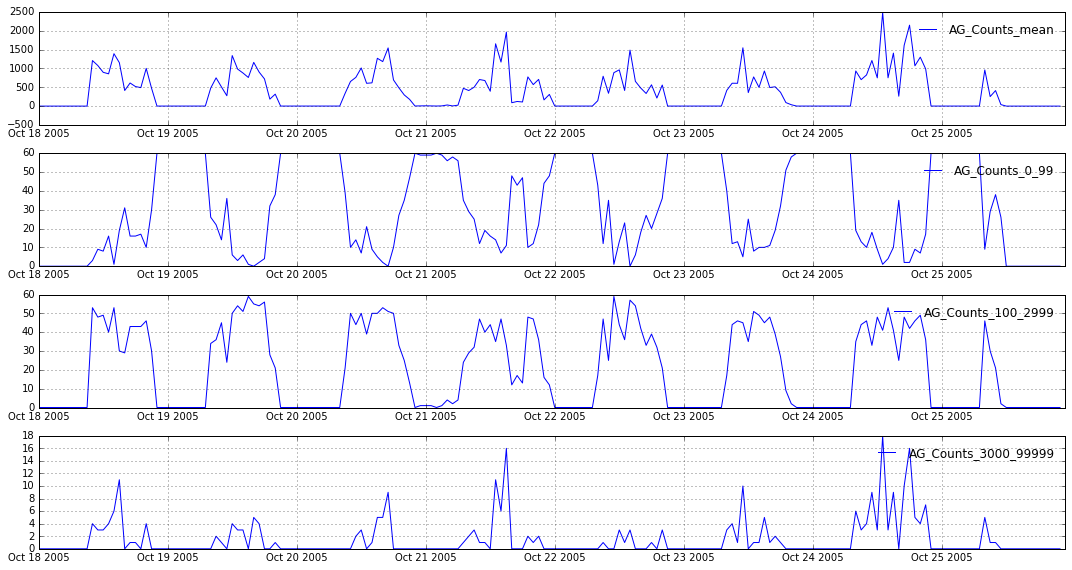

In [10]:
stats = {"AG_Counts":[("generic", ["mean"]), ("cutpoints", [[0,99],[100,2999],[3000,99999]])]}

simplified = ts.piecewise_statistics(timedelta(hours=1), stats)

chart = simplified.draw([["AG_Counts_mean"],["AG_Counts_0_99"],["AG_Counts_100_2999"],["AG_Counts_3000_99999"]], height=2*4)

This is a brief demonstration of the most basic features of pampro. 

It is essentially a collection of objects and functions to piece together an analysis of your own. Please explore the other [pampro examples](https://github.com/Thomite/pampro/tree/master/examples) to see the more advanced features it offers.